In [1]:
#Impot libraries
import numpy as np
import glob
import os
import pandas as pd
from pylab import figure, text, scatter, show
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'--To avoid warnings 

In [2]:
#Question 1 - Who are the users?  

def question_1():
    #1.1
    df_a = df_userdata[df_userdata['item_id'].str.startswith('q')].drop_duplicates(subset = 'item_id',keep = 'last')
    merged_df = pd.merge(df_questions, df_a, how='inner',left_on ='question_id', right_on='item_id')
    merged_df['Result'] = np.where((merged_df['correct_answer'] == merged_df['user_answer']),True,False)
    df_correct=merged_df[merged_df['Result']==True]
    d = {'Total_ans': [len(merged_df)], 'correct_ans': [len(df_correct)]}
    df = pd.DataFrame(data=d)
    df['correct_ans_percent'] = (df['correct_ans'] / df['Total_ans'].sum()) * 100
    
    #1.2
    filter1 = df_userdata[df_userdata['item_id'].str.startswith('l') & df_userdata.action_type.str.contains('quit') ]
    filter2 = df_userdata[df_userdata['item_id'].str.startswith('e') & df_userdata.action_type.str.contains('enter') & df_userdata.source.str.contains('sprint') ]
    df['lectures_watched'] =len(filter1)
    df['explanation_read'] =len(filter2)
    df['user'] = user

    return df

In [3]:
#Question 2 - What are the questions/items?  

def question_2():
    #2.1
    a = df_userdata[df_userdata['item_id'].str.startswith('q')]
    c= pd.merge(df_questions,a, how='inner',left_on ='question_id', right_on='item_id')
    
    #2.2
    def iloc_abc(c,col):
        for i in c.index:
            val=c[col].iloc[i]
            if val==1 : c.at[i,'Q_Type']='Describe picture'
            elif val==2 : c.at[i,'Q_Type']='Respond to statement'
            elif val==3 : c.at[i,'Q_Type']='Conversation'
            elif val==4 : c.at[i,'Q_Type']='Long message'
            elif val==5 : c.at[i,'Q_Type']='Fill-in-the-blank sentence'
            elif val==6 : c.at[i,'Q_Type']='Letter'
            elif val==7 : c.at[i,'Q_Type']='Long message'
            else : c.at[i,'Q_Type']='Nan'
    #function call            
    iloc_abc(c,'part')
    
    #2.3
    c['Counts'] = c.groupby(['question_id'])['item_id'].transform('count')
    
    #2.4
    a1 = df_userdata[df_userdata['item_id'].str.startswith('q')].drop_duplicates(subset = 'item_id',keep = 'first')
    c1 = pd.merge(df_questions,a1, how='inner',left_on ='question_id', right_on='item_id')
    c1['No_times answered correctly in 1st attempt'] = np.where((c1['correct_answer']==c1['user_answer']),1,0)
    a2=c1[c1['No_times answered correctly in 1st attempt']==1]
    df3 = a2[['question_id', 'No_times answered correctly in 1st attempt']]
    
    #create new dataframe for exel and mapping 
    d = {'Question ID': c['question_id']}
    df = pd.DataFrame(data=d)
    df['Question_type'] =c['Q_Type']
    df['Number of times being practiced'] =c['Counts']
    df=df.drop_duplicates()
    df_merge = pd.merge(df, df3, right_on='question_id', left_on='Question ID', how='left')
    df_merge = df_merge.drop('question_id', 1)
    df_merge['No_times answered correctly in 1st attempt']=df_merge['No_times answered correctly in 1st attempt'].fillna(0).astype(int)
    df_merge['user'] = user
    
    return df_merge

In [4]:
#Question 3  - Design a modified metric of “accuracy” to fairly describe users’ ability by taking into
#              account the difficulty level   

def question_3():
    df_a = df_userdata1[df_userdata1['item_id'].str.startswith('q')]
    merged_df = pd.merge(df_questions, df_a, how='inner',left_on ='question_id', right_on='item_id')
    merged_df['Result'] = np.where((merged_df['correct_answer'] == merged_df['user_answer']),1,0)
    df_c = merged_df[merged_df['Result']==1]
    df_1=merged_df
    
    df_1['Total_question_answered']=df_1.groupby(by='question_id')['question_id'].transform('count')#To find Total
    df_c['No_question_answered_correctly']=df_c.groupby(by='question_id')['question_id'].transform('count') #to find count for correct ans
    df_m = pd.merge(df_c, df_1,how='left', on = ["question_id"])
    
    ds=df_m[['question_id','Total_question_answered','No_question_answered_correctly']]
    ds=ds.drop_duplicates(subset=['question_id','No_question_answered_correctly'])
    
    #To find total accuracy_per_question
    ds['accuracy_per_question']=ds['No_question_answered_correctly']/ds['Total_question_answered']
    
    #To differentiate the ques based on Accurcy
    ds['Accurcy_range']=pd.cut(ds.accuracy_per_question, bins=3, right=True)
    ds['Accurcy_type'] = pd.cut(ds.accuracy_per_question, bins=3, labels=['Low', 'Medium', 'High'])
    
    #plot
    print ("   Question 3 : Histogram for the modified accuracy metric of across all users ")
    hist =ds.accuracy_per_question.hist(bins=3 ,figsize=(10,6),align='right', color='purple',edgecolor='black')
    text(0.1, 0.9,'Modified accuracy metric of across all users', ha='left', va='top',size='large', transform=hist.transAxes)
    hist

    return ds

In [5]:
#Question 4 - Pick a user with a reasonable amount of activity

def question_4():
    d_q = pd.DataFrame()
    list3 = []
    qu = df_userdata[df_userdata['item_id'].str.startswith('q')].drop_duplicates(subset = 'item_id',keep = 'last')
    list3.append(len(qu))
    d_q['count'] = list3
    d_q['user'] = user
    return d_q

#for plot
def question_4p():
    a=mini
    df_plot = pd.read_csv(mini)
    a1 = df_plot[df_plot['item_id'].str.startswith('q')]
    a2 = df_plot[df_plot['item_id'].str.startswith('l')]
    a3 = df_plot[df_plot['item_id'].str.startswith('e')]
    
    d = {'Count_question':len(a1),'Count_lect':len(a2),'Count_explain':len(a3)}#add data into datframe
    df = pd.DataFrame(data=d, index=[0])
    
    df.plot(kind = 'bar',figsize=(5,6),title='Q4-User with a reasonable amount of activity ',xlabel=a,ylabel='Scale')
    return df


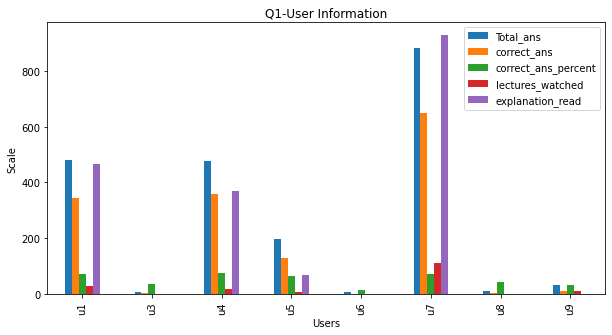

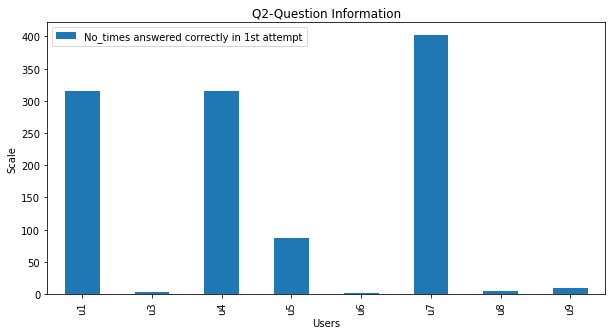

   Question 3 : Histogram for the modified accuracy metric of across all users 


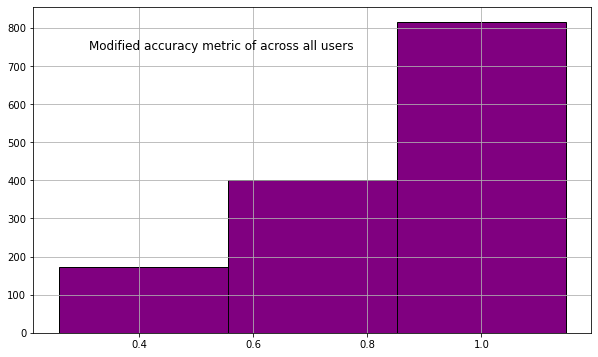

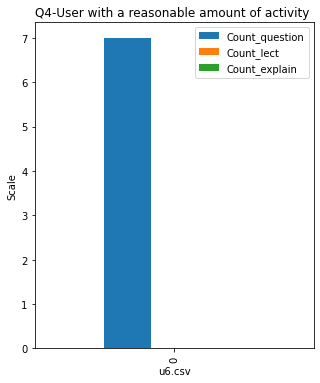

In [6]:
#Main function

df_questions = pd.read_csv('questions.csv')
du = pd.DataFrame()
df = pd.DataFrame()
qu = pd.DataFrame()
df_q1 = pd.DataFrame()
df_q2 = pd.DataFrame()
df_q3 = pd.DataFrame()
df_q4 = pd.DataFrame()

list1 = []
list2 = []
folder = r'C:\Users\Tejal\Desktop\user'
file_type = 'csv'
seperator =','

for f in glob.glob(folder + "/*.csv"):
    
    user = f.split('\\')[5][:2]
    list2.append(user)
    
    df_userdata = pd.read_csv(f, sep=seperator)
    df_q1 = df_q1.append(question_1())
    df_q2 = df_q2.append(question_2())
    df_q4 = df_q4.append(question_4())
    
df_q1['user'] = list2
df_q1.set_index('user',inplace=True)


#1.3
df_q1["Accuracy ans_correctly"] = pd.cut(df_q1.correct_ans_percent, bins=3, labels=['Low','Medium','High'])
df_q1['Accuracy lect_watched'] = pd.cut(df_q1.lectures_watched,  bins=3, labels=['Low','Medium','High'])
df_q1['Accuracy explanation_read'] = pd.cut(df_q1.explanation_read,  bins=3, labels=['Low','Medium','High'])
df_q1 = df_q1[~df_q1.index.duplicated(keep='first')]
df_q4 = df_q4.drop_duplicates(subset = 'user',keep = 'first')


#plots 
df_q1.plot(kind='bar', figsize=(10,5),title='Q1-User Information',xlabel='Users',ylabel='Scale')#q1

df_q2.groupby(['user']).agg({'No_times answered correctly in 1st attempt':'sum'}).plot(kind = 'bar',figsize=(10,5),title='Q2-Question Information',xlabel='Users',ylabel='Scale')
plt.show()#q2

#for q3
df_userdata1 = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder + "/*."+file_type)],ignore_index=True)
df_q3 = df_q3.append(question_3())

#question_4p
du1 = df_q4[df_q4['count'] == df_q4['count'].min()]
mini = du1['user'][0]
mini = mini+'.csv'
df41=question_4p()


In [7]:

print("For question 4: Number of questions attemted(count) with respect to User ")
print("")
print("User with minimal activities",mini)
df_q4



For question 4: Number of questions attemted(count) with respect to User 

User with minimal activities u6.csv


,count,user
0,480,u1
0,8,u3
0,476,u4
0,197,u5
0,7,u6
0,881,u7
0,12,u8
0,33,u9


In [8]:
print("Question 1")
df_q1

Question 1


,Total_ans,correct_ans,correct_ans_percent,lectures_watched,explanation_read,Accuracy ans_correctly,Accuracy lect_watched,Accuracy explanation_read
user,,,,,,,,
u1,480,346,72.083333,29,465,High,Low,Medium
u3,8,3,37.500000,0,0,Low,Low,Low
u4,476,360,75.630252,18,370,High,Low,Medium
u5,197,130,65.989848,9,70,Medium,Low,Low
u6,7,1,14.285714,0,0,Low,Low,Low
u7,881,648,73.552781,112,928,High,High,High
u8,12,5,41.666667,0,0,Low,Low,Low
u9,33,11,33.333333,10,0,Low,Low,Low


In [9]:
print("Question 2")
df_q2

Question 2


,Question ID,Question_type,Number of times being practiced,No_times answered correctly in 1st attempt,user
0,q7,Describe picture,2,0,u1
1,q10,Describe picture,1,0,u1
2,q11,Describe picture,1,0,u1
3,q59,Describe picture,1,0,u1
4,q63,Describe picture,1,1,u1
...,...,...,...,...,...
28,q11059,Describe picture,4,1,u9
29,q11107,Describe picture,3,0,u9
30,q11938,Letter,2,0,u9
31,q17139,Fill-in-the-blank sentence,1,0,u9


In [10]:
print("Question 3")
df_q3

Question 3


,question_id,Total_question_answered,No_question_answered_correctly,accuracy_per_question,Accurcy_range,Accurcy_type
0,q2,1,1,1.000000,"(0.704, 1.0]",High
1,q3,4,1,0.250000,"(0.11, 0.407]",Low
5,q5,5,1,0.200000,"(0.11, 0.407]",Low
10,q6,3,1,0.333333,"(0.11, 0.407]",Low
13,q7,5,3,0.600000,"(0.407, 0.704]",Medium
...,...,...,...,...,...,...
6575,q17349,1,1,1.000000,"(0.704, 1.0]",High
6576,q17367,3,1,0.333333,"(0.11, 0.407]",Low
6579,q17368,1,1,1.000000,"(0.704, 1.0]",High
6580,q17377,1,1,1.000000,"(0.704, 1.0]",High
